# Python Bytes Reference Authority

We will download the RSS feed and analyze all the links, extract the domain names, and plot them by popularity.

In [2]:
import feedparser
import bs4

Download the RSS feed and convert it to a Python dictionary.

In [4]:
url = 'https://pythonbytes.fm/rss'
feed = feedparser.parse(url)

Get all the descriptions from each podcast episode.

In [10]:
# feed.get('items')[0].get('description')
descriptions = [ item.get('description') for item in feed.get('items') ]
print(f"We found {len(descriptions)} descriptions.")

We found 157 descriptions.


From each HTML fragment, get the links. They look like:

```
<p>This episode is sponsored by DigitalOcean: <a href="http://pythonbytes.fm/digitalocean"><strong>pythonbytes.fm/digitalocean</strong></a></p>\n\n<p><strong>Michael #1:</strong> <a href="https://pydantic-docs.helpmanual.io/"><strong>pydantic</strong></a></p>\n\n<ul>\n<li>via <a href="https://twitter.com/sullivancolin/status/1192482220168093697">Colin Sullivan</a></li>\n<li>Data
```

In [15]:
all_links = []

for d in descriptions:
    soup = bs4.BeautifulSoup(d)
    links = [a['href'] for a in  soup.findAll('a')]
    all_links.extend(links)

print(f"We found {len(all_links):,} total links.")

We found 2,824 total links.


Convert the links from hyperlinks over to just domains.

In [27]:
import urllib.parse

domains = [urllib.parse.urlparse(l).netloc for l in all_links]
print(f"There are {len(set(domains))} unique domains")

There are 799 unique domains


How many times does each domain appear?

In [31]:
import collections

counter = collections.Counter(domains)
most_common = counter.most_common()
top_25 = most_common[0:25]
top_25

[('github.com', 447),
 ('twitter.com', 202),
 ('pythonbytes.fm', 142),
 ('www.youtube.com', 69),
 ('www.python.org', 66),
 ('medium.com', 53),
 ('www.reddit.com', 43),
 ('realpython.com', 39),
 ('talkpython.fm', 31),
 ('docs.python.org', 30),
 ('pypi.python.org', 30),
 ('training.talkpython.fm', 26),
 ('testandcode.com', 26),
 ('pypi.org', 23),
 ('hackernoon.com', 23),
 ('lwn.net', 21),
 ('en.wikipedia.org', 21),
 ('docs.pytest.org', 20),
 ('devguide.python.org', 20),
 ('do.co', 19),
 ('pythonforengineers.com', 18),
 ('pragprog.com', 15),
 ('arstechnica.com', 15),
 ('rollbar.com', 15),
 ('opensource.com', 14)]

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

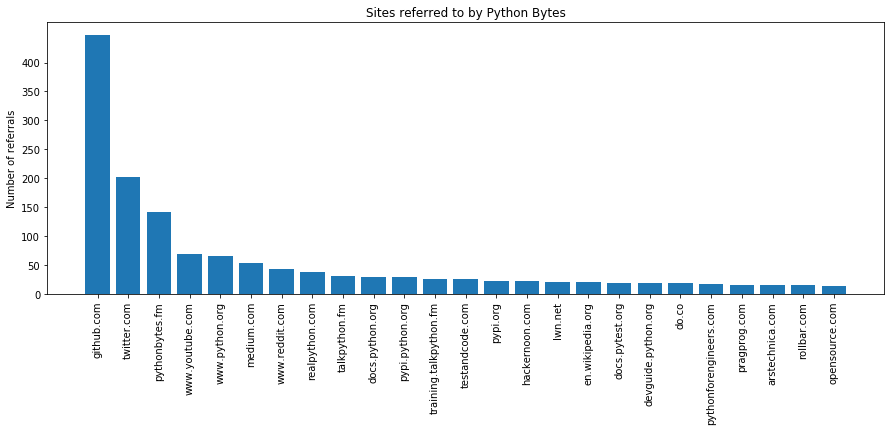

In [34]:
plt.rcParams["figure.figsize"] = (15,5)

values = [t[1] for t in top_25]
value_bins = [t[0] for t in top_25 ]

ind = list(range(1, len(values)+1))    # the x locations for the groups
width = 0.40       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width)
p1 = plt.bar(ind, values, width*2)

plt.ylabel('Number of referrals')
plt.title('Sites referred to by Python Bytes')
plt.xticks(ind, value_bins, rotation='vertical')
plt.yticks(np.arange(0, max(values), 50))
plt.width = 500